In [1]:
import cv2  # pip install
import numpy as np  # pip install
import glob
import matplotlib.pyplot as plt # pip install
from scipy.spatial import distance as dist  # pip install
import random as rand 
import tqdm

In [2]:
class KMeans():
    def __init__(self, k, max_iter=100, random_state=42):
        self.k = k 
        self.max_iter = max_iter
        self.random_state = random_state
        
    def initialize_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])        
        centroids = X[random_idx[:self.k]]
        return centroids
    
    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for k in range(self.k):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.k))
        for k in range(self.k):
            #row_norm = np.linalg.norm(X - centroids[k, :], axis=1)
            row_norm = np.sum((X - centroids[k, :])**2, axis=1) #Euclid
            distance[:, k] = np.square(row_norm)
            
            
            #row_norm = np.max(abs(X - centroids[k, :]), axis=1) #Chebishev
            #distance[:, k] = row_norm
            
            
            #row_norm = np.sum(abs(X - centroids[k, :]), axis=1) #Manhatten
            #distance[:, k] = row_norm
            
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)
    
    def compute_dist_measure(self, distance):
        return np.sum(np.min(distance, axis=1))
    
    def fit(self, X):
        self.X = X
        print(X)
        # 1.centroid init
        self.centroids = self.initialize_centroids(self.X)
        self.distotrionmeasure = []
        # 2.iterations through data points and evaluation of centroids' positions
        internumber = 0
        for i in tqdm.tqdm(range(self.max_iter)):
            internumber = internumber + 1
            old_centroids = self.centroids
            distance = self.compute_distance(self.X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(self.X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
            if (i > 0):
                self.distotrionmeasure.append(self.compute_dist_measure(distance))
        return self.distotrionmeasure, np.arange(start=0, stop=internumber, step=1)

    def classify(self):
        distance = self.compute_distance(self.X, self.centroids)
        centroid_idx = self.find_closest_cluster(distance)
        new_image = self.X
        
        for i in tqdm.tqdm(range(len(new_image))):
            new_image[i] = self.centroids[centroid_idx][i]
            
        return new_image
    

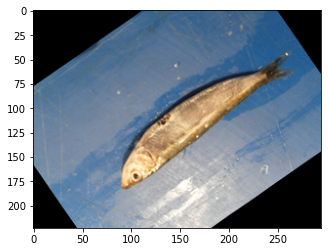

In [3]:
import copy
image = cv2.cvtColor(cv2.imread('img1.png'), cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
data = np.array(image.reshape((-1,3)))
image.shape


(223, 295, 3)

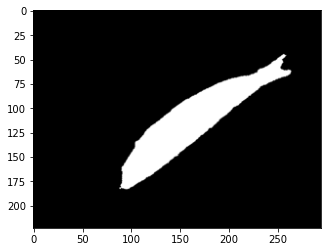

In [5]:
mask = cv2.cvtColor(cv2.imread('mask1.png'), cv2.COLOR_BGR2RGB)
plt.imshow(mask, cmap='gray')
plt.show()

In [6]:
#Make the classify for every point in the original image and substitute the color with the result of classify()
import copy
errors = []
kmeans=[]
segmented_data=[]
i=0
#k number of clasters
for k in [2,3,5,10]:
    kmeans.append(KMeans(k))
    errors.append(kmeans[i].fit(copy.deepcopy(data)))
    segmented_data.append(kmeans[i].classify())
    i+=1

  0%|          | 0/65785 [00:00<?, ?it/s]

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


  0%|          | 0/65785 [00:00<?, ?it/s]

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


  5%|▌         | 5/100 [00:00<00:02, 44.97it/s]

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


  3%|▎         | 3/100 [00:00<00:04, 21.31it/s]

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


100%|██████████| 65785/65785 [01:30<00:00, 727.27it/s]


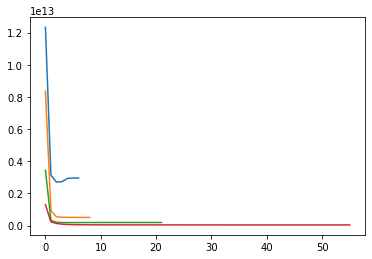

In [7]:
for i in range(len(errors)):
    plt.plot(errors[i][0])

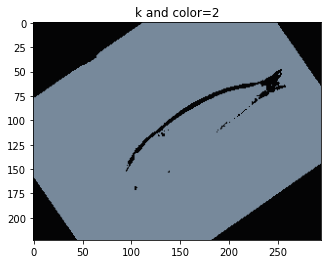

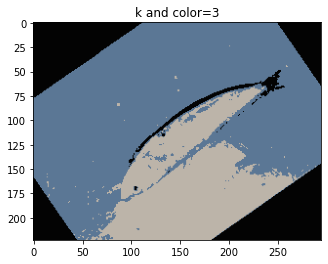

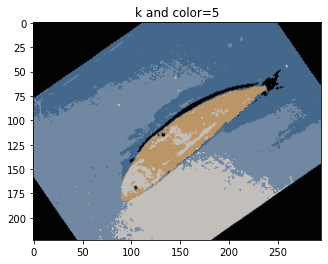

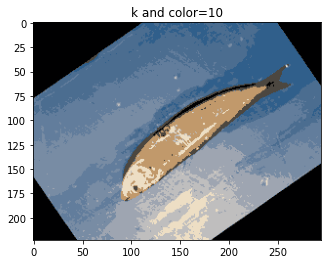

In [31]:
#k number of clasters
k_list=[2,3,5,10]
segmented_image=[]
uniq_colors=[]
for i in range(len(segmented_data)):
    segmented_img = segmented_data[i].reshape((223, 295, 3))
    segmented_image.append(segmented_img)# reshape data into the original image dimensions
    kl=k_list[i]
    plt.figure()
    plt.title("k and color=" + str(kl) )
    plt.imshow(segmented_image[i])

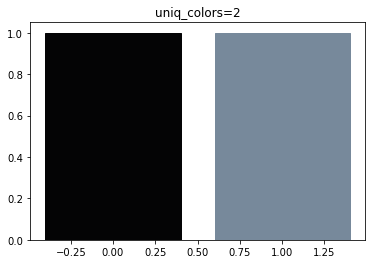

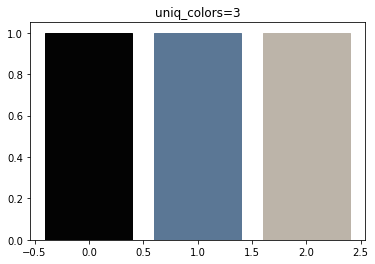

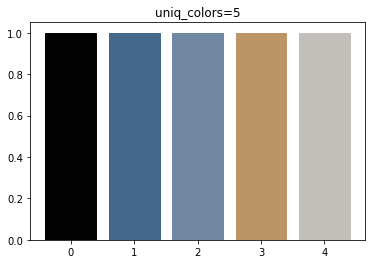

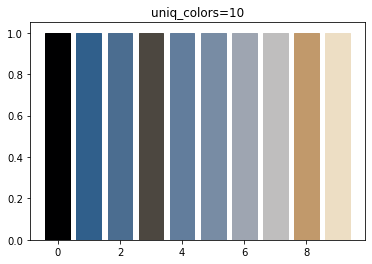

In [33]:
uniq_colors=[]
for i in range(len(segmented_data)):
    uniq_colors1 = np.unique(segmented_image[i].reshape(-1,3), axis=0)
    uniq_colors.append(uniq_colors1)
    barlist=plt.bar([j for j in range(len(uniq_colors1))], 1)
    kl=k_list[i]
    plt.title("uniq_colors=" + str(kl) )
    for u in range(len(uniq_colors1)):
        barlist[u].set_color((uniq_colors1[u]/255))
    plt.show()

In [ ]:
#get binary mask for each type of clusters
#calculate dice and IoU metrics for each binary mask 
#provide your descritpiton in which case k means algorithms works better 

In [21]:
a = (np.array(segmented_data[0].reshape((-1,3))) == uniq_colors[0][0] * 1).reshape((223, 295, 3))
b = (np.array(segmented_data[1].reshape((-1,3))) == uniq_colors[1][2] * 1).reshape((223, 295, 3))
c = (np.array(segmented_data[2].reshape((-1,3))) == uniq_colors[2][3] * 1).reshape((223, 295, 3))
d = (np.array(segmented_data[3].reshape((-1,3))) == uniq_colors[3][8] * 1).reshape((223, 295, 3))

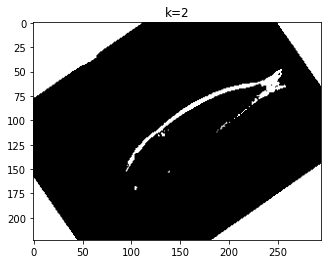

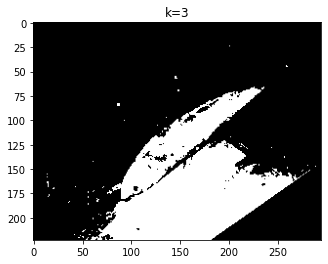

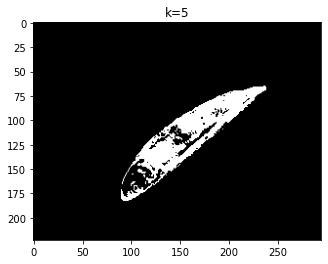

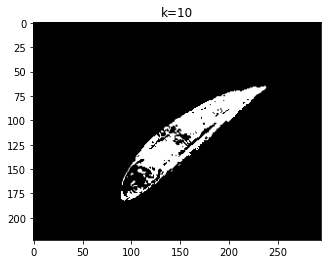

In [26]:
n=0
for i in a,b,c,d:
    kl=k_list[n]
    plt.figure()
    
    plt.title("binary mask k=" + str(kl) ) 
    i = i * 255
    plt.imshow(i)
    n+=1

for k=2
<function IoU at 0x00000201FD7DB430>
for k=2
<function dice at 0x00000201FD7DB3A0>
for k=3
<function IoU at 0x00000201FD7DB430>
for k=3
<function dice at 0x00000201FD7DB3A0>
for k=5
<function IoU at 0x00000201FD7DB430>
for k=5
<function dice at 0x00000201FD7DB3A0>
for k=10
<function IoU at 0x00000201FD7DB430>
for k=10
<function dice at 0x00000201FD7DB3A0>


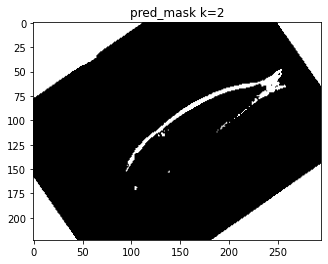

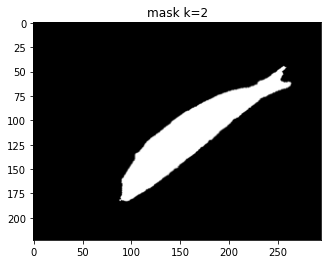

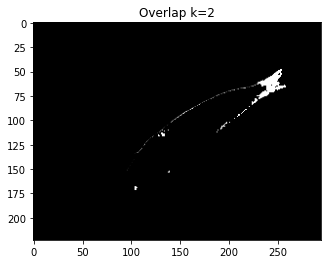

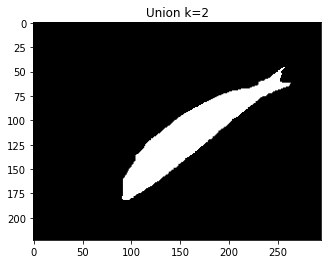

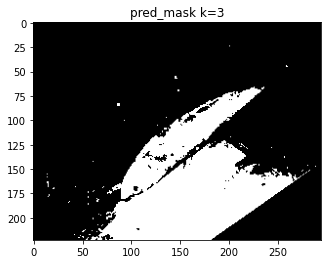

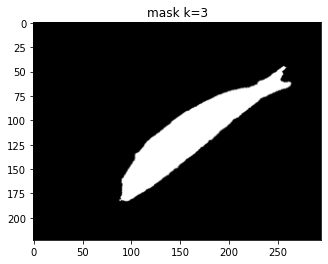

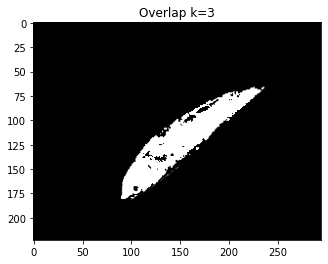

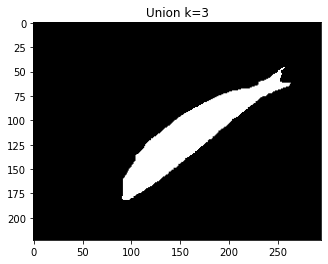

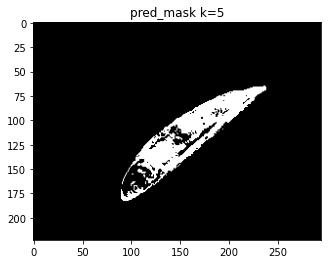

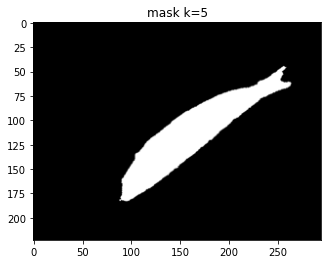

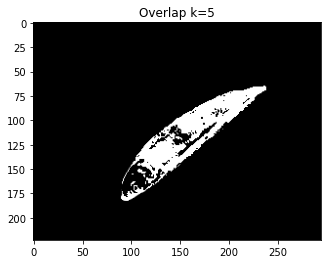

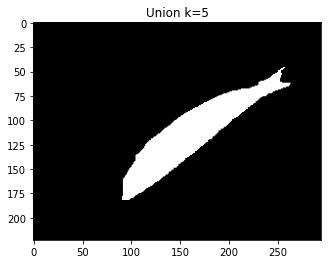

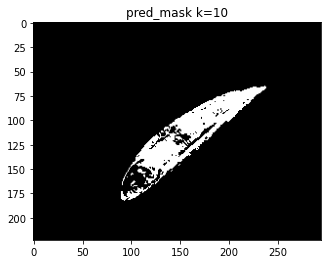

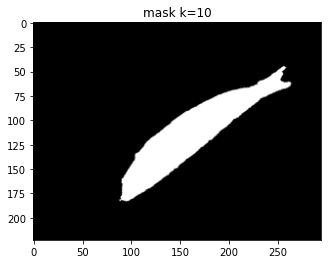

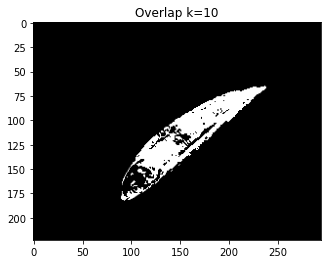

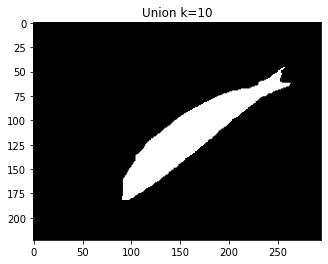

In [38]:
n=0
for i in a,b,c,d:
    mask = cv2.cvtColor(cv2.imread('mask1.png'), cv2.COLOR_BGR2RGB)
    pred_mask = cv2.cvtColor(np.float32(i), cv2.COLOR_BGR2GRAY)
    pred_mask = pred_mask/255
    mask = mask/255
    kl=k_list[n]
    plt.figure()
    plt.title("pred_mask k=" + str(kl) ) 
    plt.imshow(pred_mask, cmap='gray')
    plt.figure()
    plt.title("mask k=" + str(kl) )
    plt.imshow(mask, cmap='gray')
    mask1 = cv2.cvtColor(np.float32(mask), cv2.COLOR_BGR2GRAY)
    #Overlap
    plt.figure()
    plt.title("Overlap k=" + str(kl) ) 
    plt.imshow(mask1 * pred_mask, cmap='gray')
    #Union
    plt.figure()
    plt.title("Union k=" + str(kl) ) 
    plt.imshow(((mask1 + pred_mask) >= 1)**2, cmap='gray')
    n+=1
    

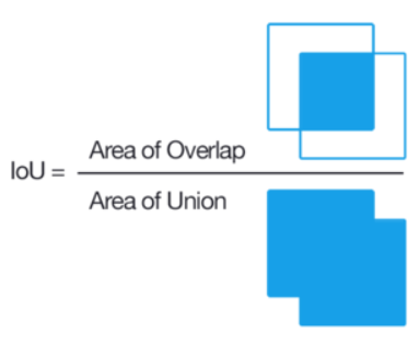

In [48]:
#write metrics with numpy (formulas are fiven in the presentation)
def IoU(mask, pred_mask):
    iou = np.sum(mask * pred_mask)/np.sum(mask + pred_mask)
    return print(iou)

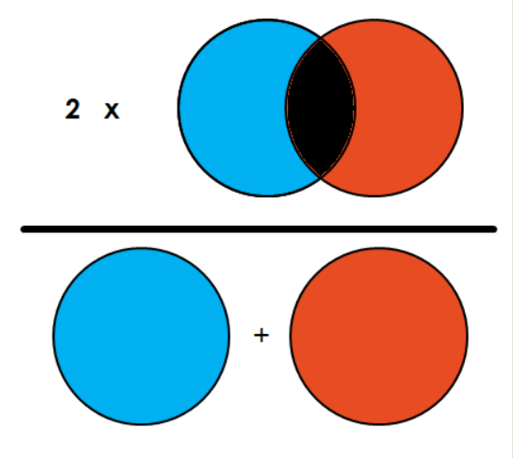

In [49]:
def dice(mask, pred_mask):
    dice=(2*np.sum(mask * pred_mask))/(np.sum(mask) + np.sum(pred_mask))
    return print(dice)

In [50]:
mask = cv2.cvtColor(cv2.imread('mask1.png'), cv2.COLOR_BGR2RGB)
pred_mask2 = (cv2.cvtColor(np.float32(a), cv2.COLOR_BGR2GRAY))/255
pred_mask3 = (cv2.cvtColor(np.float32(b), cv2.COLOR_BGR2GRAY))/255
pred_mask5 = (cv2.cvtColor(np.float32(c), cv2.COLOR_BGR2GRAY))/255
pred_mask10 = (cv2.cvtColor(np.float32(d), cv2.COLOR_BGR2GRAY))/255
mask = mask/255
mask1 = cv2.cvtColor(np.float32(mask), cv2.COLOR_BGR2GRAY)

In [51]:
IoU(mask1, pred_mask2)
dice(mask1, pred_mask2)

0.0002963721
0.0005927442763283663


In [52]:
IoU(mask1, pred_mask3)
dice(mask1, pred_mask3)

0.002747664
0.00549532826949768


In [53]:
IoU(mask1, pred_mask5)
dice(mask1, pred_mask5)

0.0024874173
0.004974834660523778


In [54]:
IoU(mask1, pred_mask10)
dice(mask1, pred_mask10)

0.0024331035
0.00486620745729244


In [ ]:
#provide your descritpiton in which case k means algorithms works better 

as the k-value increases, the image becomes clearer and more distinct because the K-means algorithm can classify more classes / clusters of colours

about the metric in binary segmentation, the highest result is at k=3. With 2 it gets the lowest. And with 5, 10 is slightly lower than 3.
it happened because a few extra shades on the fish started to interfere with each other. compared to 3. where this didn't happen